<a href="https://colab.research.google.com/github/guiraposo/DataScienceStudies/blob/main/Diabetes_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes Case Study

## In this notebook we will analyze the data from [Kaggle](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset) to develop a model that allows us to predict if a pacient has diabetes based on other relevant medical factors.

Let's load the necessary libraries for this analysis.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset

In [6]:
# Load the dataset
datafile = 'diabetes.csv'
data = pd.read_csv(datafile)

# Display the first few rows of the dataset
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


The datafile has 9 columns with data.

In [8]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


From a first look at the data we see that there are no empty entries. However missing data is represented by 0s in the numerical columns as it can be seen by the non-realistic values of some of the biological features.

In particular the columns that have missing values are the 'Glucose' the 'BloodPressure', the 'SkinThickness', the 'Insulin' and the 'BMI'

 We need to find ways to deal with them.

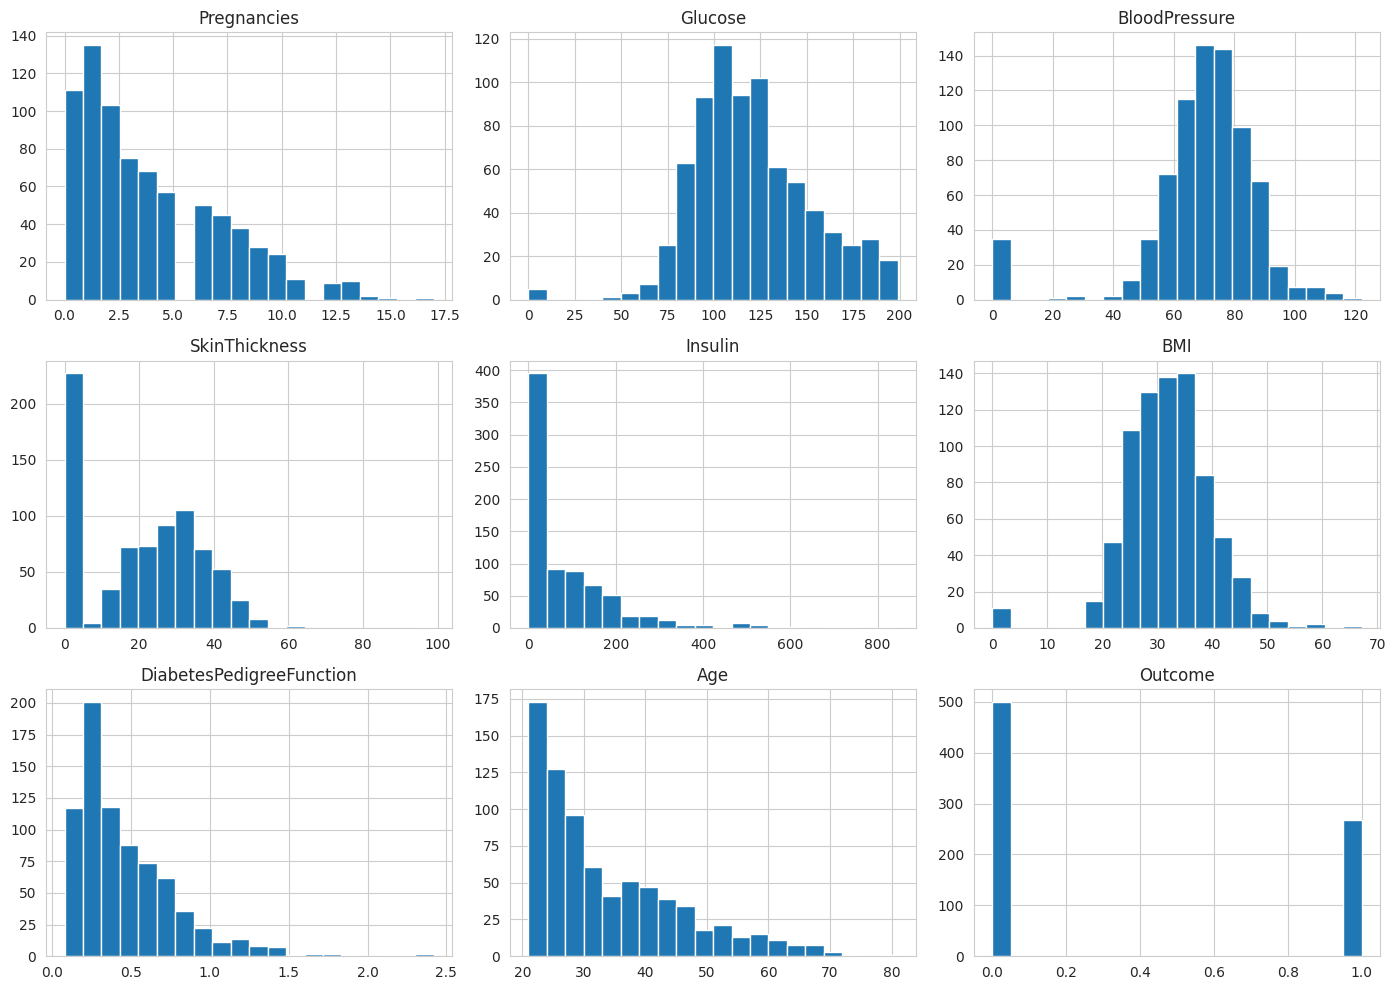

In [13]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Plot histograms for each feature
data.hist(bins=20, figsize=(14, 10))
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

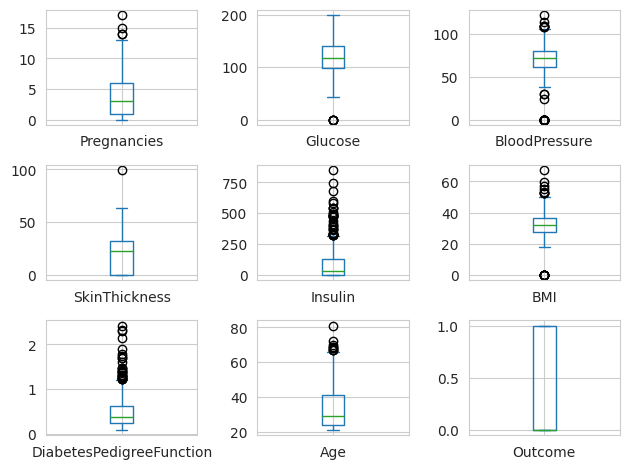

In [11]:
# Plot box plots for each feature
plt.figure(figsize=(12, 8))
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.tight_layout()
plt.show()


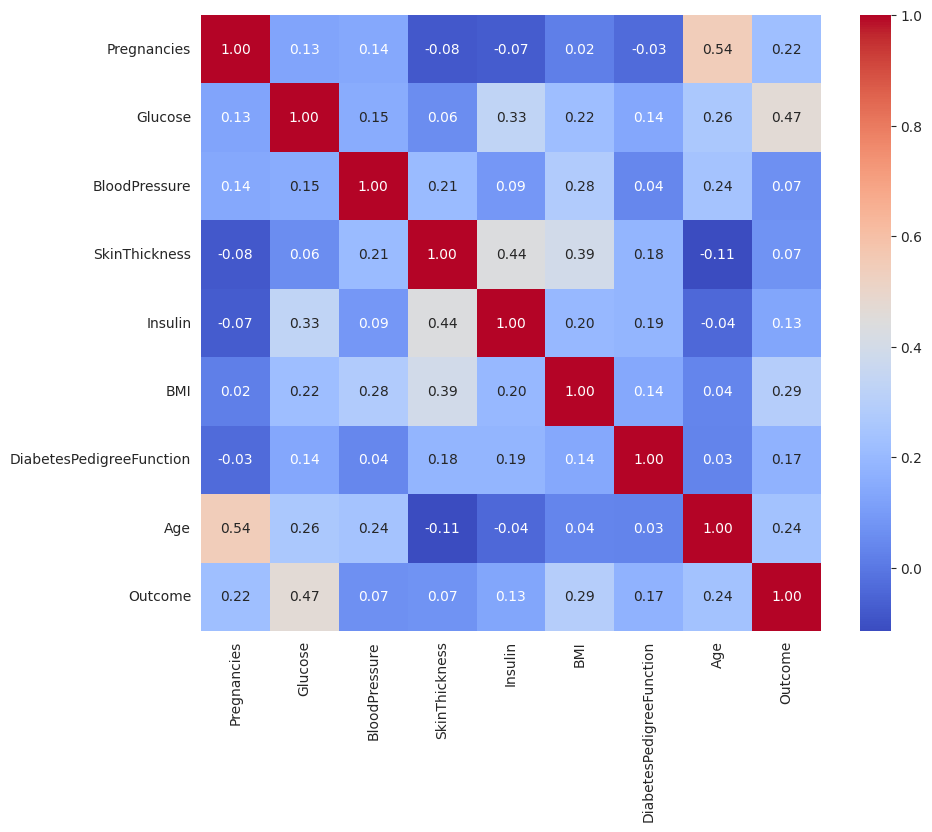

In [12]:
# Calculate correlation matrix
corr_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()
